In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 0. 데이터 불러오기

In [27]:
df5 = pd.read_csv('C:\\study\\workspace_python\pdsample\\3_상권분석을 위한 유동인구에 따른 카드 매출액 변화 데이터 활용.csv',encoding = 'cp949')

In [31]:
df5.head(5)

,년월,시도명,읍면동명,업종명,성별,이용금액,거주인구,근무인구,방문인구
0,2017-01,서귀포시,남원읍,건강보조식품 소매업,남성,137500,4365500.518,380992.059,2844836.615
1,2017-01,서귀포시,남원읍,비알콜 음료점업,남성,2904000,4365500.518,380992.059,2844836.615
2,2017-01,서귀포시,남원읍,여관업,남성,6283900,4365500.518,380992.059,2844836.615
3,2017-01,서귀포시,남원읍,스포츠 및 레크레이션 용품 임대업,남성,8671410,4365500.518,380992.059,2844836.615
4,2017-01,서귀포시,남원읍,슈퍼마켓,남성,55925490,4365500.518,380992.059,2844836.615


In [34]:
df5.tail()

,년월,시도명,읍면동명,업종명,성별,이용금액,거주인구,근무인구,방문인구,데이터기준일자
90538,2020-04,제주시,화북동,수산물 소매업,여성,2216500,9241265.99,481026.216,2598152.464,2020-12-15
90539,2020-04,제주시,화북동,서양식 음식점업,여성,5374000,9241265.99,481026.216,2598152.464,2020-12-15
90540,2020-04,제주시,화북동,빵 및 과자류 소매업,여성,24042720,9241265.99,481026.216,2598152.464,2020-12-15
90541,2020-04,제주시,화북동,육류 소매업,여성,24474030,9241265.99,481026.216,2598152.464,2020-12-15
90542,2020-04,제주시,화북동,화장품 및 방향제 소매업,여성,14553710,9241265.99,481026.216,2598152.464,2020-12-15


In [37]:
df5.sample(10)

,년월,시도명,읍면동명,업종명,성별,이용금액,거주인구,근무인구,방문인구,데이터기준일자
75034,2019-10,서귀포시,서홍동,화장품 및 방향제 소매업,여성,221000,1.812513e+06,185844.525,1109739.940,2020-12-15
58505,2019-02,제주시,추자면,차량용 주유소 운영업,남성,9735000,4.266946e+05,22253.317,516301.165,2020-12-15
62601,2019-04,제주시,용담1동,과실 및 채소 소매업,남성,10882250,2.006097e+06,231529.659,1451724.510,2020-12-15
34573,2018-04,서귀포시,표선면,슈퍼마켓,여성,72586160,2.719461e+06,305587.680,2425496.973,2020-12-15
69251,2019-07,제주시,애월읍,중식 음식점업,남성,28410000,1.120945e+07,1327305.102,8787576.825,2020-12-15
39580,2018-06,제주시,삼양동,화장품 및 방향제 소매업,여성,9697220,6.927401e+06,286853.469,1515061.899,2020-12-15
58515,2019-02,제주시,추자면,차량용 가스 충전업,남성,639000,4.266946e+05,22253.317,516301.165,2020-12-15
29956,2018-02,서귀포시,중앙동,수산물 소매업,여성,104034200,7.014241e+05,166875.259,1472138.353,2020-12-15
3310,2017-02,제주시,도두동,슈퍼마켓,여성,24159430,4.035644e+05,44764.517,1095710.708,2020-12-15
6462,2017-03,제주시,조천읍,차량용 가스 충전업,남성,17569640,5.897964e+06,788935.940,4452947.602,2020-12-15


In [29]:
df5.drop('데이터기준일자', axis = 1, inplace = True)

결측치가 없기 때문에 바로 피처 엔지니어링 해도 된다고 판단.  

In [115]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90543 entries, 0 to 90542
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시도명     90543 non-null  object 
 1   읍면동명    90543 non-null  object 
 2   업종명     90543 non-null  object 
 3   성별      90543 non-null  object 
 4   이용금액    90543 non-null  int64  
 5   거주인구    90543 non-null  float64
 6   근무인구    90543 non-null  float64
 7   방문인구    90543 non-null  float64
 8   연도      90543 non-null  int32  
 9   월       90543 non-null  int32  
 10  계절      90543 non-null  object 
dtypes: float64(3), int32(2), int64(1), object(5)
memory usage: 6.9+ MB


# 1. 데이터 전처리

|칼럼명|칼럼내용|
|--------|-------------|
|년월|각 행의 정보의 시점을 알려줌|
|시도명|제주도 행정구역 중 시에 관한 정보|
|읍면동명|제주도 행정구역 중 읍면동에 관한 정보|
|업종명|업종 소분류|
|성별|소비자 성별|
|이용금액|총 구매금액|
|거주인구|제주도 특정 행정구역의 인구수 |
|근무인구|특정 시기의 특정 구역의 근무인구 수|
|방문인구|특정 시기의 특정 구역의 근무인구 수|
|데이터기준일자|데이터 등록 일자|


## 1.1 피처 엔지니어링

### 1.1.1 년,월 column 생성

In [34]:
year = []
for i in df5['년월'].str.split('-'):
    year.append(i[0])
    

In [35]:
month = []
for i in df5['년월'].str.split('-'):
    month.append(i[1])

In [36]:
df5['연도'] = year
df5['월'] = month

In [37]:
df5.sample(10)

,년월,시도명,읍면동명,업종명,성별,이용금액,거주인구,근무인구,방문인구,연도,월
23032,2017-11,서귀포시,표선면,체인화 편의점,남성,92641394,2.933041e+06,382357.765,2309202.360,2017,11
60416,2019-03,제주시,우도면,서양식 음식점업,남성,15247450,4.415422e+05,33712.456,481291.206,2019,03
9586,2017-05,서귀포시,중문동,골프장 운영업,여성,12920700,2.186381e+06,259786.501,2071518.400,2017,05
9142,2017-05,서귀포시,동홍동,건강보조식품 소매업,여성,4272250,5.311933e+06,405240.767,2380674.114,2017,05
59857,2019-03,제주시,삼도1동,관광 민예품 및 선물용품 소매업,남성,3144000,2.921907e+06,235437.507,2265465.959,2019,03
47786,2018-10,서귀포시,안덕면,중식 음식점업,남성,11537500,4.632882e+06,822399.471,3439842.468,2018,10
65378,2019-05,제주시,추자면,기타 주점업,여성,1550000,3.879705e+05,18898.023,370570.112,2019,05
78187,2019-11,제주시,삼도1동,빵 및 과자류 소매업,남성,9624260,2.789936e+06,214784.778,2252000.194,2019,11
59804,2019-03,제주시,도두동,빵 및 과자류 소매업,여성,199500,3.664051e+05,48369.639,1227488.006,2019,03
76183,2019-10,제주시,연동,일식 음식점업,남성,149923900,1.390554e+07,1956756.226,8370081.459,2019,10


In [42]:
#연도와 월에 관한 정보를 추출했으니 년월 칼럼은 필요 없다고 생각하여 삭제


df5.drop('년월', axis  = 1, inplace = True)

In [43]:
#연도와 월 칼럼은 추출 원리상 문자형이기 때문에 다시 숫자형으로 변환

df5['월'] = df5['월'].astype(int)
df5['연도'] = df5['연도'].astype(int)


In [45]:
df5.head()

,시도명,읍면동명,업종명,성별,이용금액,거주인구,근무인구,방문인구,연도,월
0,서귀포시,남원읍,건강보조식품 소매업,남성,137500,4365500.518,380992.059,2844836.615,2017,1
1,서귀포시,남원읍,비알콜 음료점업,남성,2904000,4365500.518,380992.059,2844836.615,2017,1
2,서귀포시,남원읍,여관업,남성,6283900,4365500.518,380992.059,2844836.615,2017,1
3,서귀포시,남원읍,스포츠 및 레크레이션 용품 임대업,남성,8671410,4365500.518,380992.059,2844836.615,2017,1
4,서귀포시,남원읍,슈퍼마켓,남성,55925490,4365500.518,380992.059,2844836.615,2017,1


### 1.1.2 계절 column 생성

> 아이디어  :
> 계절별로 업종명별 이용금액을 파악하여, 계절에 따른 인기 품목을 알 수 있겠다 생각했다.

In [48]:
df_cd = df5.copy()

In [50]:
df_cd['계절'] = 0

In [52]:
#오류가 생성이 되는데 어떻게 하면 없앨 수 있을지 모르겠네여...

spring = [3,4,5]
summer = [6,7,8]
fall = [9,10,11]
winter = [12,1,2]

for i in range(len(df_cd['계절'])):
    if df_cd['월'][i] in spring:
        df_cd['계절'][i] = '봄'
    elif df_cd['월'][i] in summer:
        df_cd['계절'][i] = '여름'
    elif df_cd['월'][i] in fall:
        df_cd['계절'][i] = '가을'
    elif df_cd['월'][i] in winter:
        df_cd['계절'][i] = '겨울'
        


<ipython-input-52-ddd44c76975f>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cd['계절'][i] = '겨울'
C:\ca_da\anaconda\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
<ipython-input-52-ddd44c76975f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cd['계절'][i] = '봄'
<ipython-input-52-ddd44c76975f>:10: SettingWithCopyWarning: 
A value is 

In [55]:
#계절 칼럼이 생성된 것을 확인
df_cd.head(3)

,시도명,읍면동명,업종명,성별,이용금액,거주인구,근무인구,방문인구,연도,월,계절
0,서귀포시,남원읍,건강보조식품 소매업,남성,137500,4365500.518,380992.059,2844836.615,2017,1,겨울
1,서귀포시,남원읍,비알콜 음료점업,남성,2904000,4365500.518,380992.059,2844836.615,2017,1,겨울
2,서귀포시,남원읍,여관업,남성,6283900,4365500.518,380992.059,2844836.615,2017,1,겨울


### 1.1.3 업종명 대분류 column 생성

>아이디어 : 소매업, 음식점업, 입대업 등등으로 크게 분류해서 대분류명별 구매금액을 나타낼 수 있다.  
>그리고 음식점업 중에서 한식, 중식, 일식 소분류로 나누어 각 분류별 구매금액도 나타낼 수 있다고 생각

In [57]:
#업종명 종류를 살펴볼 예정. -> 소분류를 파악하여 대분류를 고안할 생각

df_cd['업종명'].unique()

array(['건강보조식품 소매업', '비알콜 음료점업', '여관업', '스포츠 및 레크레이션 용품 임대업', '슈퍼마켓',
       '수산물 소매업', '서양식 음식점업', '빵 및 과자류 소매업', '기타음식료품위주종합소매업',
       '그외 기타 종합 소매업', '기타 주점업', '기타 외국식 음식점업', '자동차 임대업', '과실 및 채소 소매업',
       '중식 음식점업', '골프장 운영업', '육류 소매업', '일반유흥 주점업', '일식 음식점업',
       '전시 및 행사 대행업', '차량용 가스 충전업', '차량용 주유소 운영업', '체인화 편의점',
       '피자, 햄버거, 샌드위치 및 유사 음식점업', '한식 음식점업', '화장품 및 방향제 소매업', '휴양콘도 운영업',
       '욕탕업', '기타 대형 종합 소매업', '그외 기타 스포츠시설 운영업', '관광 민예품 및 선물용품 소매업',
       '여행사업', '호텔업', '그외 기타 분류안된 오락관련 서비스업', '내항 여객 운송업', '마사지업',
       '기타 수상오락 서비스업', '면세점', '정기 항공 운송업', '버스 운송업', '기타 갬블링 및 베팅업',
       '택시 운송업'], dtype=object)

- 대분류를 총 7 개로 나눌 예정
    - 소매업
    - 음식점
    - 주류점 (주류 소비와 음식 소비 분석을 나누고 싶었음)
    - 운송업
    - 숙박업
    - 기타

In [102]:
#소분류를 참조하여 대분류 리스트를 생성

retail = ['건강보조식품 소매업','슈퍼마켓','수산물 소매업','빵 및 과자류 소매업', '기타음식료품위주종합소매업',
         '그외 기타 종합 소매업','과실 및 채소 소매업','육류 소매업','화장품 및 방향제 소매업','기타 대형 종합 소매업',
         '관광 민예품 및 선물용품 소매업','체인화 편의점','면세점']

food_store = ['서양식 음식점업', '기타 외국식 음식점업','중식 음식점업','일식 음식점업',
              '한식 음식점업','피자, 햄버거, 샌드위치 및 유사 음식점업']

drink = ['비알콜 음료점업','기타 주점업','일반유흥 주점업']

vehicle = ['택시 운송업','버스 운송업','정기 항공 운송업','내항 여객 운송업','자동차 임대업']

service = ['그외 기타 분류안된 오락관련 서비스업','기타 수상오락 서비스업']

rooms = ['휴양콘도 운영업', '여관업','호텔업']

others = [ '스포츠 및 레크레이션 용품 임대업','골프장 운영업', '전시 및 행사 대행업', '차량용 가스 충전업',
          '차량용 주유소 운영업','욕탕업',  '그외 기타 스포츠시설 운영업','여행사업', '마사지업','기타 갬블링 및 베팅업']




In [103]:
#시리즈에 넣을 데이터를 만들기 위해서 리스트 안에 조건부 정보를 집어 넣기.

job_type = []
for i in range(len(df_cd['업종명'])):
    if df_cd['업종명'][i] in retail:
        job_type.append('소매업')
    elif df_cd['업종명'][i] in food_store:
        job_type.append('음식점')
    elif df_cd['업종명'][i] in vehicle:
        job_type.append('운송업')
    elif df_cd['업종명'][i] in drink:
        job_type.append('주류')
    elif df_cd['업종명'][i] in service:
        job_type.append('서비스업')
    elif df_cd['업종명'][i] in rooms:
        job_type.append('숙박업')
    else :
        
        job_type.append('기타')
        
        


In [105]:
#업종 대분류 칼럼을 생성

job_type_series = pd.Series(data = job_type)
job_type_series
df_cd['업종 대분류'] = job_type_series


In [114]:
#잘 됐는지 확인하기

df_cd.sample(10)

,시도명,읍면동명,업종명,성별,이용금액,거주인구,근무인구,방문인구,연도,월,계절,업종 대분류
5988,제주시,오라동,화장품 및 방향제 소매업,여성,10163000,4.326104e+06,527475.309,4121585.687,2017,3,봄,소매업
10493,제주시,외도동,서양식 음식점업,남성,32005800,2.762131e+06,162904.470,1737559.740,2017,5,봄,음식점
88829,서귀포시,예래동,"피자, 햄버거, 샌드위치 및 유사 음식점업",남성,16693200,1.157064e+06,245775.051,1385210.370,2020,4,봄,음식점
86796,서귀포시,중앙동,한식 음식점업,남성,561208616,6.077867e+05,183651.541,1321570.507,2020,3,봄,음식점
12723,제주시,외도동,슈퍼마켓,남성,198826600,2.702619e+06,159831.726,1657791.777,2017,6,여름,소매업
26088,제주시,애월읍,일식 음식점업,남성,37094230,1.101790e+07,1365130.973,8033398.090,2017,12,겨울,음식점
23640,제주시,삼도1동,스포츠 및 레크레이션 용품 임대업,남성,20916540,2.721843e+06,212847.698,2209794.134,2017,11,가을,기타
22220,제주시,조천읍,건강보조식품 소매업,여성,1075400,5.698116e+06,512400.195,5053416.986,2017,10,가을,소매업
51421,제주시,이도1동,비알콜 음료점업,여성,7797050,2.427119e+06,622438.495,2725292.563,2018,11,가을,주류
75954,제주시,삼도2동,관광 민예품 및 선물용품 소매업,여성,4865000,1.545784e+06,300213.003,2051576.666,2019,10,가을,소매업


### outlier 제거

<AxesSubplot:>

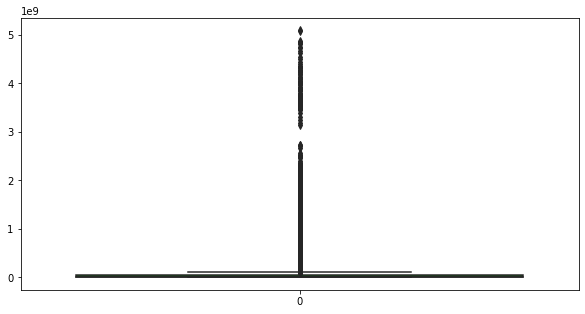

In [185]:
#이용금액 outlier 확인 후 제거

plt.figure(figsize  = (10,5))
sns.boxplot(data = df_cd['이용금액'], color = 'green')

<AxesSubplot:>

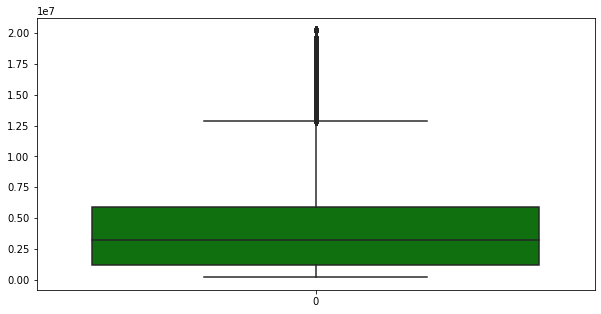

In [186]:
plt.figure(figsize  = (10,5))
sns.boxplot(data = df_cd['거주인구'], color = 'green')

<AxesSubplot:>

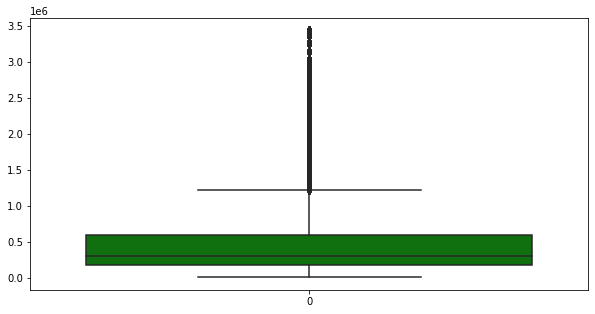

In [187]:
plt.figure(figsize  = (10,5))
sns.boxplot(data = df_cd['근무인구'], color = 'green')

<AxesSubplot:>

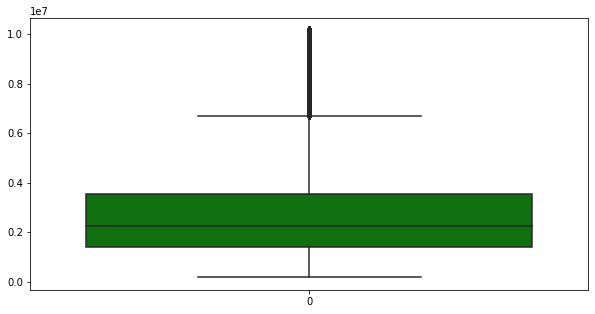

In [188]:
plt.figure(figsize  = (10,5))
sns.boxplot(data = df_cd['방문인구'], color = 'green')

In [189]:
def find_outlier_index(col_name):
    q1, q3 = np.percentile(df_cd[col_name], [25,75])
    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    index = np.where((df_cd[col_name] > upper_bound) | (df_cd[col_name] < lower_bound))
    
    return index
    

In [190]:
usage_amount_outiler_index = find_outlier_index('이용금액')[0]
resi_pop_outlier_index = find_outlier_index('거주인구')[0]
work_pop_outlier_index = find_outlier_index('근무인구')[0]
visit_pop_outlier_index = find_outlier_index('방문인구')[0]

In [191]:
usage_amount_outiler_index
resi_pop_outlier_index 
work_pop_outlier_index
visit_pop_outlier_index

array([  974,   998,  1009, ..., 90156, 90192, 90194], dtype=int64)

In [192]:
df_cd.loc[usage_amount_outiler_index, '이용금액']

8        182203998
16       285901584
23       255016971
26       231687924
33       128868518
           ...    
90506    161139880
90512    212140680
90517    261235390
90522    223419484
90529    157709014
Name: 이용금액, Length: 11376, dtype: int64

In [193]:
df_cd.loc[resi_pop_outlier_index,'거주인구']

974      17896202.46
998      15752619.53
1009     15752619.53
1010     15752619.53
1011     15752619.53
            ...     
90154    18438717.24
90155    18438717.24
90156    18438717.24
90192    18438717.24
90194    18438717.24
Name: 거주인구, Length: 8161, dtype: float64

In [194]:
df_cd.loc[work_pop_outlier_index,'근무인구']

974      1759925.530
998      1803517.678
1009     1803517.678
1010     1803517.678
1011     1803517.678
            ...     
90154    1842424.099
90155    1842424.099
90156    1842424.099
90192    1842424.099
90194    1842424.099
Name: 근무인구, Length: 10825, dtype: float64

In [195]:
df_cd.loc[visit_pop_outlier_index,'방문인구']

974      7542506.038
998      8221676.280
1009     8221676.280
1010     8221676.280
1011     8221676.280
            ...     
90154    7189000.972
90155    7189000.972
90156    7189000.972
90192    7189000.972
90194    7189000.972
Name: 방문인구, Length: 9190, dtype: float64

In [196]:
outlier_index = np.concatenate((usage_amount_outiler_index,
                resi_pop_outlier_index,
                work_pop_outlier_index,
                visit_pop_outlier_index                
               ), axis = None)

In [197]:
outlier_index

array([    8,    16,    23, ..., 90156, 90192, 90194], dtype=int64)

In [198]:
non_outlier_index = []
for i in df_cd.index:
    if i not in outlier_index:
        non_outlier_index.append(i)


In [199]:
df_cd2 = df_cd.loc[non_outlier_index]
df_cd2

,시도명,읍면동명,업종명,성별,이용금액,거주인구,근무인구,방문인구,연도,월
0,서귀포시,남원읍,건강보조식품 소매업,남성,137500,4365500.518,380992.059,2844836.615,2017,1
1,서귀포시,남원읍,비알콜 음료점업,남성,2904000,4365500.518,380992.059,2844836.615,2017,1
2,서귀포시,남원읍,여관업,남성,6283900,4365500.518,380992.059,2844836.615,2017,1
3,서귀포시,남원읍,스포츠 및 레크레이션 용품 임대업,남성,8671410,4365500.518,380992.059,2844836.615,2017,1
4,서귀포시,남원읍,슈퍼마켓,남성,55925490,4365500.518,380992.059,2844836.615,2017,1
...,...,...,...,...,...,...,...,...,...,...
90538,제주시,화북동,수산물 소매업,여성,2216500,9241265.990,481026.216,2598152.464,2020,4
90539,제주시,화북동,서양식 음식점업,여성,5374000,9241265.990,481026.216,2598152.464,2020,4
90540,제주시,화북동,빵 및 과자류 소매업,여성,24042720,9241265.990,481026.216,2598152.464,2020,4
90541,제주시,화북동,육류 소매업,여성,24474030,9241265.990,481026.216,2598152.464,2020,4


# 2. 탐색적 데이터 분석

## 2.1 각 칼럼별 데이터 type 확인

> 각 칼럼별 데이터 유형을 확인해서 어떤 탐색 기법을 사용할지 판단

|범주형 데이터||구간 데이터|
|----------|----------|----------|
|시도명|  |이용금액|
|읍면동명|  |거주인구|
|업종명|  |근무인구|
|성별|  |방문인구|
|계절|  | |
|업종 대분류|  | |
|연도|  | |
|월|  | |

In [116]:
#각 칼럼별 데이터 유형을 확인.

df_cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90543 entries, 0 to 90542
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시도명     90543 non-null  object 
 1   읍면동명    90543 non-null  object 
 2   업종명     90543 non-null  object 
 3   성별      90543 non-null  object 
 4   이용금액    90543 non-null  int64  
 5   거주인구    90543 non-null  float64
 6   근무인구    90543 non-null  float64
 7   방문인구    90543 non-null  float64
 8   연도      90543 non-null  int32  
 9   월       90543 non-null  int32  
 10  계절      90543 non-null  object 
 11  업종 대분류  90543 non-null  object 
dtypes: float64(3), int32(2), int64(1), object(6)
memory usage: 7.6+ MB


## 2.2 각 칼럼별 수치와 그래프 

### 2.2.1 범주형 데이터

In [129]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns

In [136]:
#범주형 데이터만 가져와서 데이터 프레임 살펴보기

df_cd[['시도명','읍면동명','업종명','성별','계절','업종 대분류','연도','월']].head()

,시도명,읍면동명,업종명,성별,계절,업종 대분류,연도,월
0,서귀포시,남원읍,건강보조식품 소매업,남성,겨울,소매업,2017,1
1,서귀포시,남원읍,비알콜 음료점업,남성,겨울,주류,2017,1
2,서귀포시,남원읍,여관업,남성,겨울,숙박업,2017,1
3,서귀포시,남원읍,스포츠 및 레크레이션 용품 임대업,남성,겨울,기타,2017,1
4,서귀포시,남원읍,슈퍼마켓,남성,겨울,소매업,2017,1


##### 시도명

In [123]:
#1 - 시도명
#두 유형의 데이터를 가짐

df_cd['시도명'].unique()

array(['서귀포시', '제주시'], dtype=object)

In [126]:
#각 유형의 count 계산 후 시각화

count = df_cd['시도명'].value_counts()
count

제주시     54107
서귀포시    36436
Name: 시도명, dtype: int64

<AxesSubplot:ylabel='시도명'>

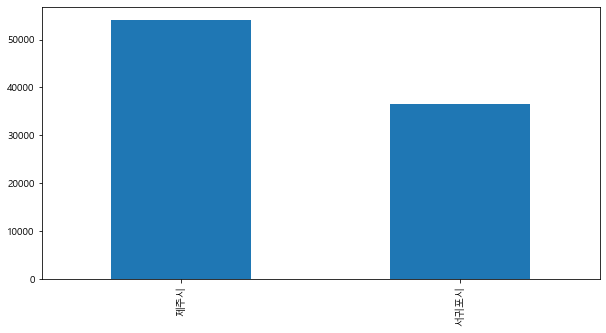

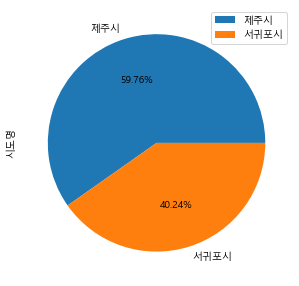

In [134]:
fm = mp.font_manager.FontManager()
plt.rcParams['font.family'] = 'Malgun Gothic'

plt.figure(figsize=(10,5))
count.plot(kind = 'bar')
plt.figure(figsize=(10,5))
count.plot(kind = 'pie', legend = True, autopct = '%.2f%%')


제주시가 59.76% 로 40.24 서귀포시 보다 더 많은 행을 가지고 있음.  
즉, 제주시에서 소비한 건수가 더 많다고 할 수 있다.  

##### 읍면동명

In [137]:
df_cd['읍면동명'].unique()

array(['남원읍', '도두동', '대정읍', '대륜동', '동홍동', '대천동', '예래동', '서홍동', '성산읍',
       '송산동', '안덕면', '영천동', '건입동', '정방동', '중문동', '표선면', '천지동', '중앙동',
       '구좌읍', '효돈동', '노형동', '용담2동', '이호동', '봉개동', '삼도2동', '삼도1동', '아라동',
       '삼양동', '애월읍', '연동', '오라동', '외도동', '용담1동', '우도면', '이도2동', '이도1동',
       '일도1동', '일도2동', '한림읍', '한경면', '조천읍', '추자면', '화북동'], dtype=object)

In [140]:
count2 = df_cd['읍면동명'].value_counts()

<AxesSubplot:ylabel='읍면동명'>

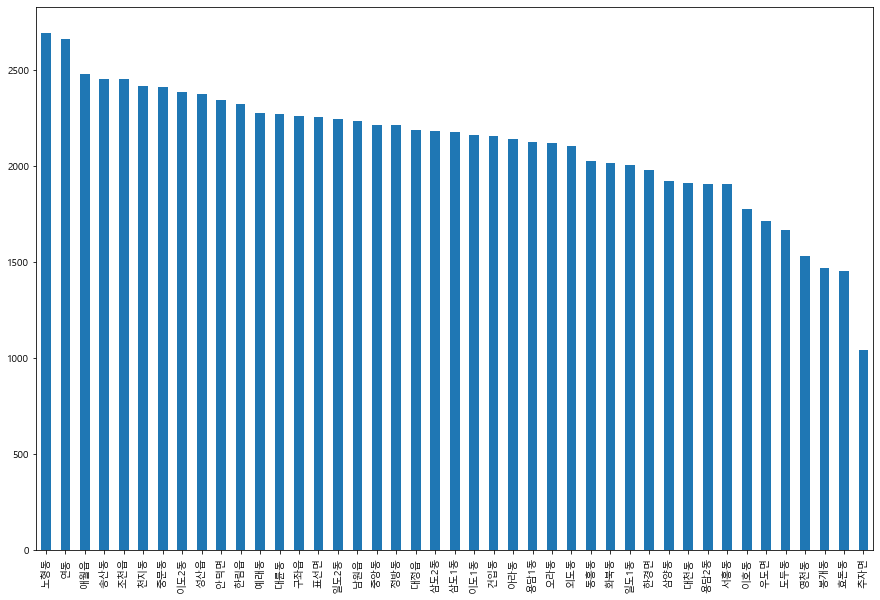

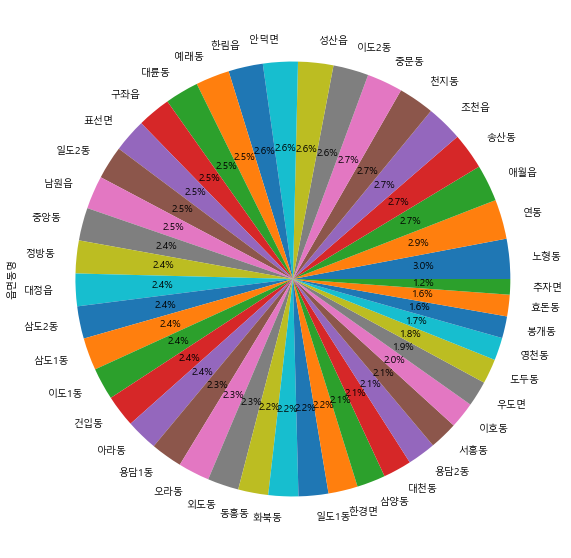

In [153]:
plt.figure(figsize = (15,10))
count2.plot(kind = 'bar')
plt.figure(figsize = (20,10))
count2.plot(kind = 'pie', autopct = '%.1f%%')

노형동이 가장 많은 비율을 가지고 있다.  
근데 다른 csv 파일에는 1동, 2동으로 나뉘어져 있지 않고 합쳐져 있기 때문에 맞추기 위해서 합치려고 한다  

> 잠깐 여기서 다시 전처리

In [156]:
#용담2동, 삼도2동, 삼도1동, 용담1동, 이도2동, 이도1동, 일도1동, 일도2동 을 "~동" 으로 바꾸기
df_cd['읍면동명'].replace({'용담2동' : '용담동', '삼도2동' : '삼도동', '삼도1동' : '삼도동',
                      '용담1동' : '용담동', '이도2동' : '이도동', '이도1동' : '이도동', '일도1동' : '일도동',
                      '일도2동' : '일도동'}, inplace = True)

In [157]:
df_cd['읍면동명'].unique()

array(['남원읍', '도두동', '대정읍', '대륜동', '동홍동', '대천동', '예래동', '서홍동', '성산읍',
       '송산동', '안덕면', '영천동', '건입동', '정방동', '중문동', '표선면', '천지동', '중앙동',
       '구좌읍', '효돈동', '노형동', '용담동', '이호동', '봉개동', '삼도동', '아라동', '삼양동',
       '애월읍', '연동', '오라동', '외도동', '우도면', '이도동', '일도동', '한림읍', '한경면',
       '조천읍', '추자면', '화북동'], dtype=object)

In [162]:
count2_2=df_cd['읍면동명'].value_counts()

In [ ]:
#틀리지 않고 바뀐 것을 확인

print(count2['삼도1동'] + count2['삼도2동'] == count2_2['삼도동'], count2['용담2동'] + count2['용담1동'] == count2_2['용담동'])

<AxesSubplot:ylabel='읍면동명'>

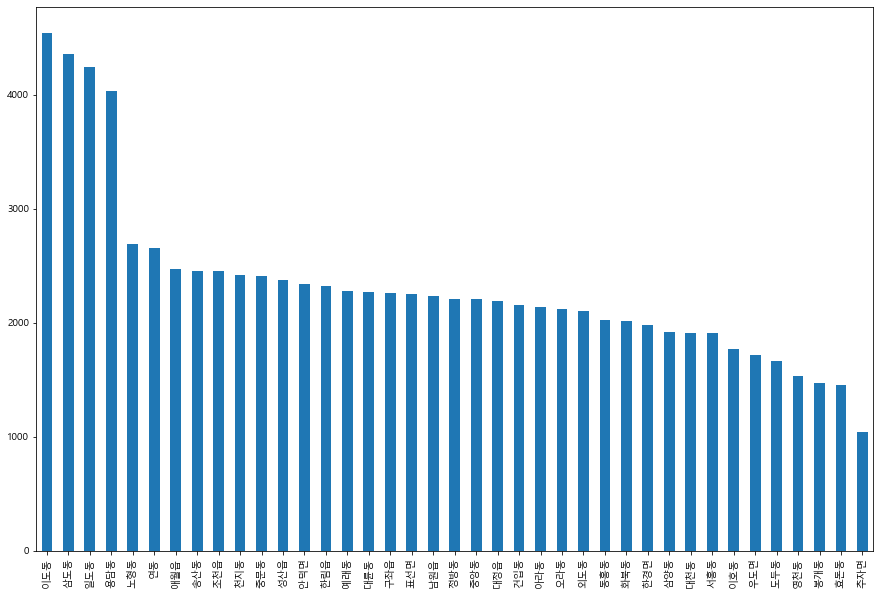

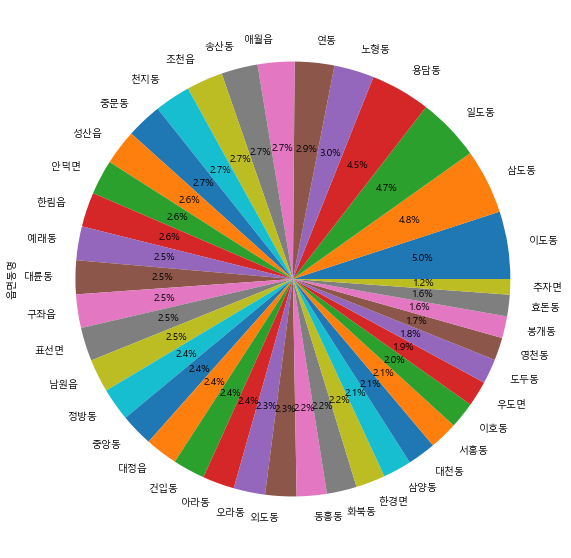

In [166]:
plt.figure(figsize = (15,10))
count2_2.plot(kind = 'bar')
plt.figure(figsize = (20,10))
count2_2.plot(kind = 'pie', autopct = '%.1f%%')

1동 2동을 합치게 되니 각 칼럼의 도수와 상대도수 비율이 달라지게 됨  
본래는 노형동이 가장 큰 상대도수를 가지고 있었는데, 이도 -> 삼도 -> 일도 순으로 높은 도수를 보임

##### 업종명

In [167]:
#정리하기 쉽지 않게 모여 있음.

df_cd['업종명'].unique()

array(['건강보조식품 소매업', '비알콜 음료점업', '여관업', '스포츠 및 레크레이션 용품 임대업', '슈퍼마켓',
       '수산물 소매업', '서양식 음식점업', '빵 및 과자류 소매업', '기타음식료품위주종합소매업',
       '그외 기타 종합 소매업', '기타 주점업', '기타 외국식 음식점업', '자동차 임대업', '과실 및 채소 소매업',
       '중식 음식점업', '골프장 운영업', '육류 소매업', '일반유흥 주점업', '일식 음식점업',
       '전시 및 행사 대행업', '차량용 가스 충전업', '차량용 주유소 운영업', '체인화 편의점',
       '피자, 햄버거, 샌드위치 및 유사 음식점업', '한식 음식점업', '화장품 및 방향제 소매업', '휴양콘도 운영업',
       '욕탕업', '기타 대형 종합 소매업', '그외 기타 스포츠시설 운영업', '관광 민예품 및 선물용품 소매업',
       '여행사업', '호텔업', '그외 기타 분류안된 오락관련 서비스업', '내항 여객 운송업', '마사지업',
       '기타 수상오락 서비스업', '면세점', '정기 항공 운송업', '버스 운송업', '기타 갬블링 및 베팅업',
       '택시 운송업'], dtype=object)

In [171]:
df_cd['업종명'].value_counts()

체인화 편의점                    3440
한식 음식점업                    3440
슈퍼마켓                       3440
과실 및 채소 소매업                3433
중식 음식점업                    3430
서양식 음식점업                   3384
여관업                        3355
수산물 소매업                    3349
비알콜 음료점업                   3344
스포츠 및 레크레이션 용품 임대업         3318
빵 및 과자류 소매업                3306
차량용 주유소 운영업                3280
육류 소매업                     3273
일식 음식점업                    3210
기타 외국식 음식점업                3045
피자, 햄버거, 샌드위치 및 유사 음식점업    2958
기타음식료품위주종합소매업              2897
화장품 및 방향제 소매업              2813
욕탕업                        2811
차량용 가스 충전업                 2757
관광 민예품 및 선물용품 소매업          2725
기타 주점업                     2632
전시 및 행사 대행업                2556
그외 기타 종합 소매업               2486
건강보조식품 소매업                 2424
일반유흥 주점업                   2269
호텔업                        1786
여행사업                       1651
그외 기타 스포츠시설 운영업            1153
자동차 임대업                    1122
골프장 운영업                    1058
휴양콘도 운영업

업종명은 그래프로 데이터의 정보를 나타내기 좋지 않다고 판단.  
따라서 각 데이터별 도수만 수치로 나타내고 탐색 끝

##### 성별

In [172]:
#여성과 남성으로 이루어져있음.

df_cd['성별'].unique()

array(['남성', '여성'], dtype=object)

In [175]:
count4 = df_cd['성별'].value_counts()
count4

남성    45445
여성    45098
Name: 성별, dtype: int64

<AxesSubplot:ylabel='성별'>

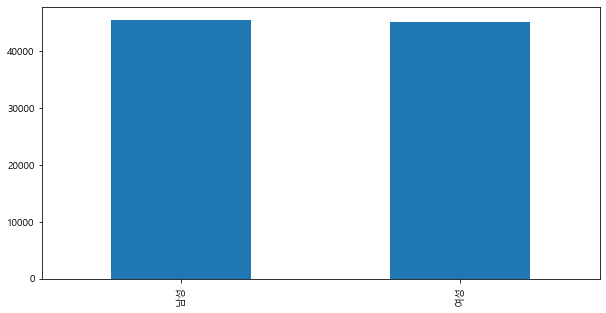

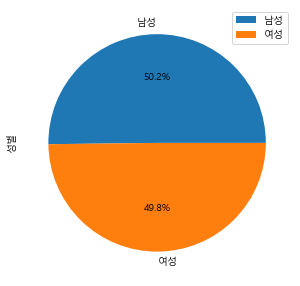

In [179]:
plt.figure(figsize = (10,5))
count4.plot(kind = 'bar')
plt.figure(figsize = (10,5))
count4.plot(kind = 'pie', autopct = '%.1f%%', legend = True)

상대도수는 별반 차이가 나지 않음을 확인, 거의 50 : 50

##### 계절

In [180]:
#봄 여름 가을 겨울로 이루어져 있음
df_cd['계절'].unique()

array(['겨울', '봄', '여름', '가을'], dtype=object)

In [183]:
count5 = df_cd['계절'].value_counts()
count5

봄     24875
겨울    24740
가을    20483
여름    20445
Name: 계절, dtype: int64

<AxesSubplot:ylabel='계절'>

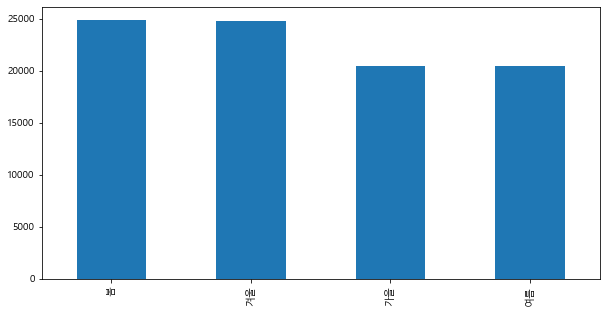

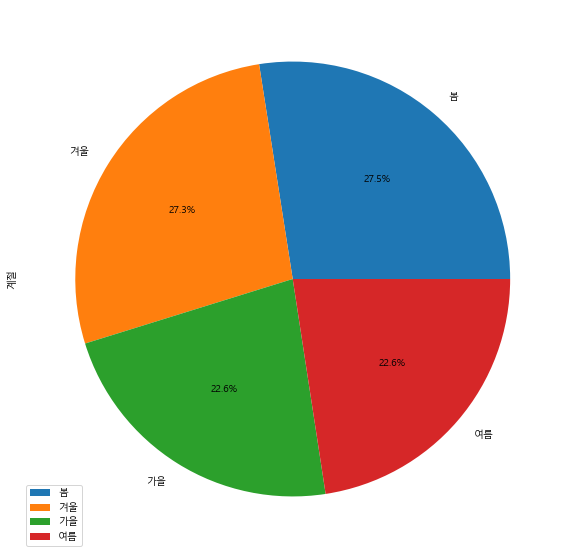

In [186]:
plt.figure(figsize = (10,5))
count5.plot(kind = 'bar')
plt.figure(figsize = (20,10))
count5.plot(kind = 'pie', autopct = '%.1f%%', legend = True)

봄 여름 가을 겨울 상대도수 차이가 나긴 하지만 거의 차이가 나지 않는 것으로 판별

##### 업종 대분류

In [191]:
#소매업, 주류, 숙박업, 기타, 음식점, 운송업, 서비스업
df_cd['업종 대분류'].unique()

array(['소매업', '주류', '숙박업', '기타', '음식점', '운송업', '서비스업'], dtype=object)

In [190]:
count6 = df_cd['업종 대분류'].value_counts()
count6

소매업     34613
음식점     19467
기타      19422
주류       8245
숙박업      6161
운송업      1746
서비스업      889
Name: 업종 대분류, dtype: int64

<AxesSubplot:ylabel='업종 대분류'>

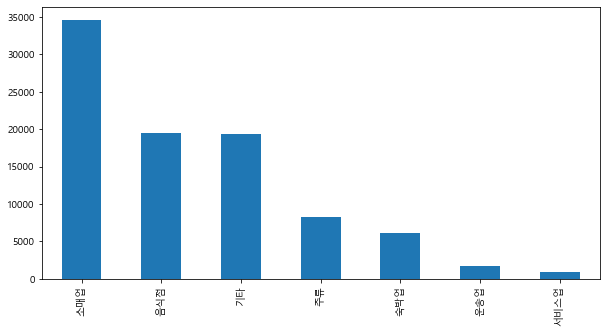

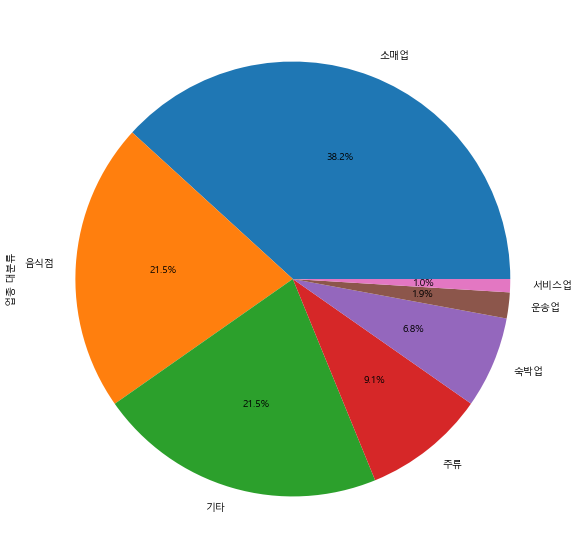

In [193]:
plt.figure(figsize = (10,5))
count6.plot(kind = 'bar')
plt.figure(figsize = (20,10))
count6.plot(kind = 'pie', autopct = '%.1f%%')

소매업이 가장 많은 도수를 기록했고 그 다음이 음식점  
제일 낮은 업종은 서비스업.

##### 연도

In [195]:
#2017, 18 19 20 의 데이터를 보유
df_cd['연도'].unique()

array([2017, 2018, 2019, 2020])

In [197]:
count7 = df_cd['연도'].value_counts()
count7

2019    27416
2018    27183
2017    26968
2020     8976
Name: 연도, dtype: int64

<AxesSubplot:ylabel='연도'>

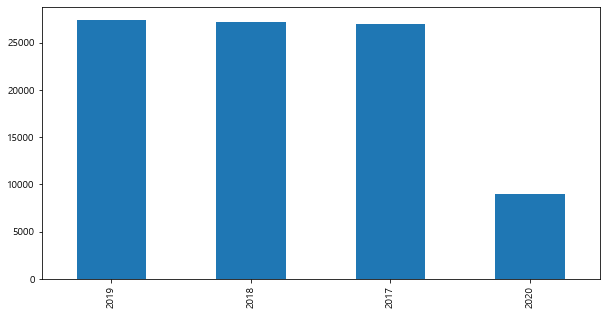

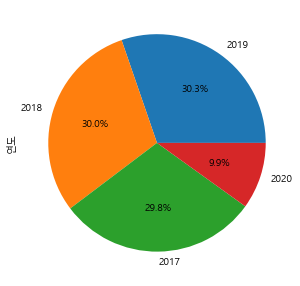

In [200]:
plt.figure(figsize = (10,5))
count7.plot(kind = 'bar')
plt.figure(figsize = (10,5))
count7.plot(kind = 'pie', autopct = '%.1f%%')

2019 > 2018 > 2017 > 2020 순으로 도수를 기록  
그러나 2018과 2019 그리고 2017은 얼마 차이가 나지 않음  

##### 월

In [201]:
df_cd['월'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [202]:
count8 = df_cd['월'].value_counts()
count8

3     9026
4     9018
1     8992
2     8962
9     6834
5     6831
8     6827
10    6826
11    6823
6     6818
7     6800
12    6786
Name: 월, dtype: int64

<AxesSubplot:ylabel='월'>

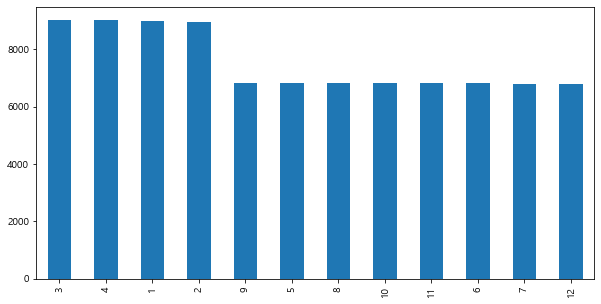

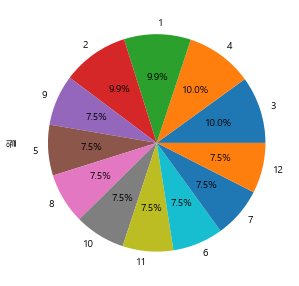

In [206]:
plt.figure(figsize = (10,5))
count8.plot(kind = 'bar')
plt.figure(figsize = (10,5))
count8.plot(kind = 'pie', autopct = '%.1f%%')

### 2.2.2 구간 데이터

In [238]:
#이용금액, 거주인구, 근무인구,방문인구 살펴볼 예정
#따로 데이터 프레임을 만든 후에 통계적 수치 확인할 예정

df_test = df_cd[['이용금액','거주인구','근무인구','방문인구']]
df_test

,이용금액,거주인구,근무인구,방문인구
0,137500,4365500.518,380992.059,2844836.615
1,2904000,4365500.518,380992.059,2844836.615
2,6283900,4365500.518,380992.059,2844836.615
3,8671410,4365500.518,380992.059,2844836.615
4,55925490,4365500.518,380992.059,2844836.615
...,...,...,...,...
90538,2216500,9241265.990,481026.216,2598152.464
90539,5374000,9241265.990,481026.216,2598152.464
90540,24042720,9241265.990,481026.216,2598152.464
90541,24474030,9241265.990,481026.216,2598152.464


In [212]:
df_test.describe()

,이용금액,거주인구,방문인구
count,9.054300e+04,9.054300e+04,9.054300e+04
mean,6.093301e+07,4.613725e+06,2.864406e+06
std,1.864599e+08,4.603426e+06,2.127175e+06
min,1.000000e+01,1.858176e+05,1.770581e+05
25%,2.667500e+06,1.234469e+06,1.424893e+06
50%,1.212000e+07,3.187437e+06,2.259516e+06
75%,4.827680e+07,5.874926e+06,3.539383e+06
max,5.092990e+09,2.021119e+07,1.015129e+07


| |이용금액|거주인구|방문인구|
|-----|-----|-----|-----|
|평균|60933010.0 |4613725.0 | 2864406.0|
|표준편차|18645990.0 |4603426.0 |2127175.0 |
|최솟값|10.0 |185817.6 |177058.1|
|최댓값|5092990000.0 |20211190.0 |10151290.0 |

수치가 나타나긴 했지만 아직 이 수치가 정확한지 파악이 되지 않음.  
그리고 이 수치가 어떤 정보를 주는지 파악이 잘 안됨.  
따라서 그래프로 각각의 칼럼들을 그려보려고 함

히스토그램을 통해서 각각의 구간데이터의 분포를 살펴보려고 함  
그리고 barplot 으로 상대 위치별 분포를 확인해보려고 함.  

##### 이용금액

<AxesSubplot:ylabel='Frequency'>

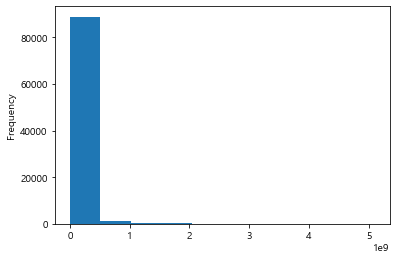

In [229]:
#히스토그램 파악하기
df_cd['이용금액'].plot(kind = 'hist')

>아이디어 : 이용금액 분포가 잘 나타나지 않음, 몇 개의 이상치 때문에 분포가 잘 나타나지 않는 것 같음  
> 따라서 온전한 분포를 보기 위해 잠시만 이상치를 제거해서 살펴보려고 함  
> 이상치 데이터들은 다시 되돌려 놓을 예정

{'whiskers': [<matplotlib.lines.Line2D at 0x16006630790>,
 'caps': [<matplotlib.lines.Line2D at 0x16006630e50>,
 'boxes': [<matplotlib.lines.Line2D at 0x16006630430>],
 'medians': [<matplotlib.lines.Line2D at 0x160065d4550>],
 'fliers': [<matplotlib.lines.Line2D at 0x160065d48b0>],
 'means': []}

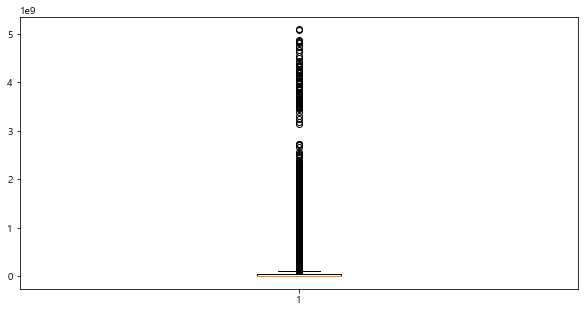

In [233]:
#박스플롯 확인하기

plt.figure(figsize=(10,5))
plt.boxplot(df_cd['이용금액'])

이상치가 엄청나게 많은 것을 확인할 수 있음. 이 때문에 분포를 제대로 파악하지 못함

> 잠깐 여기서 전처리

In [235]:
#이상치 제거하는 전처리 함수 생성

import numpy as np

def find_outlier_index(col_name):
    q1, q3 = np.percentile(df_cd[col_name], [25,75])          #1지점과 3지점을 파악
    iqr = q3 - q1                                             # 1 ~ 3 지역인 iqr 지역 파악
    lower_bound = q1 - (iqr * 1.5)                            #iqr 의 1.5배한 것을 1지역에서 뺀다 -> lower_bound 찾기 위해
    upper_bound = q3 + (iqr * 1.5)                            #iqr 의 1.5배한 것을 3지역에서 더한다 -> upper_bound를 찾기 위해
    
    index = np.where((df_cd[col_name] > upper_bound) | (df_cd[col_name] < lower_bound)) #lower,upper 범위 넘어선게 outlier, index추출
    return index
    


In [236]:
#튜플 형태로 index 반환, 0번째에 index, 1번째에 dtype
find_outlier_index('이용금액')

(array([    8,    16,    23, ..., 90517, 90522, 90529], dtype=int64),)

In [239]:
#각 구간데이터 모두 이상치를 확인해보니 굉장히 많았음 그래서 각 구간데이터의 분포가 잘 나타나지 않음

usage_amount_outiler_index = find_outlier_index('이용금액')[0]
resi_pop_outlier_index = find_outlier_index('거주인구')[0]
work_pop_outlier_index = find_outlier_index('근무인구')[0]
visit_pop_outlier_index = find_outlier_index('방문인구')[0]

In [240]:
#이용금액의 outlier index
#index가 제대로 나온 것 파악

df_cd.loc[usage_amount_outiler_index, '이용금액']

8        182203998
16       285901584
23       255016971
26       231687924
33       128868518
           ...    
90506    161139880
90512    212140680
90517    261235390
90522    223419484
90529    157709014
Name: 이용금액, Length: 11376, dtype: int64

In [241]:
#각 구간데이터 outlier index 를 합치기
outlier_index = np.concatenate((usage_amount_outiler_index,
                resi_pop_outlier_index,
                work_pop_outlier_index,
                visit_pop_outlier_index                
               ), axis = None)

In [245]:
#outlier index 아닌 index 만 리스트에 보관
non_outlier_index = []
for i in df_cd.index:
    if i not in outlier_index:
        non_outlier_index.append(i)


In [262]:
#df_cd_outlier 데이터 프레임을 따로 만들고 이걸로 구간데이터 시각화 작업
df_cd_outlier = df_cd.loc[non_outlier_index]
df_cd_outlier.head()

,시도명,읍면동명,업종명,성별,이용금액,거주인구,근무인구,방문인구,연도,월,계절,업종 대분류
0,서귀포시,남원읍,건강보조식품 소매업,남성,137500,4365500.518,380992.059,2844836.615,2017,1,겨울,소매업
1,서귀포시,남원읍,비알콜 음료점업,남성,2904000,4365500.518,380992.059,2844836.615,2017,1,겨울,주류
2,서귀포시,남원읍,여관업,남성,6283900,4365500.518,380992.059,2844836.615,2017,1,겨울,숙박업
3,서귀포시,남원읍,스포츠 및 레크레이션 용품 임대업,남성,8671410,4365500.518,380992.059,2844836.615,2017,1,겨울,기타
4,서귀포시,남원읍,슈퍼마켓,남성,55925490,4365500.518,380992.059,2844836.615,2017,1,겨울,소매업


> 잠깐 전처리 종료

In [267]:
def print_graph(col_name):
    plt.figure(figsize = (10,5))                       #이용금액 히스토그램
    df_cd_outlier[col_name].plot(kind = 'hist')


    plt.figure(figsize = (10,5))                       #분포모양 만들기
    sns.distplot(df_cd_outlier[col_name])

    plt.figure(figsize = (15,8))                       #이용금액 boxplot 그리기 
    plt.boxplot(df_cd_outlier[col_name])

C:\ca_da\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


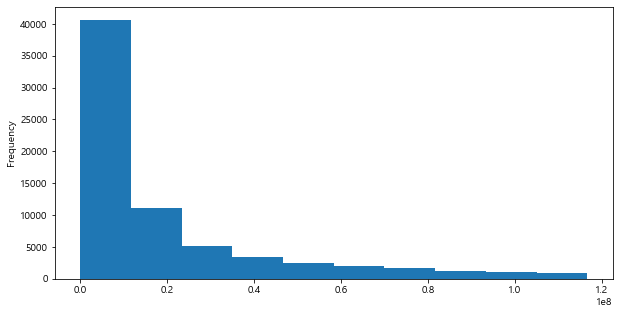

C:\ca_da\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ca_da\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


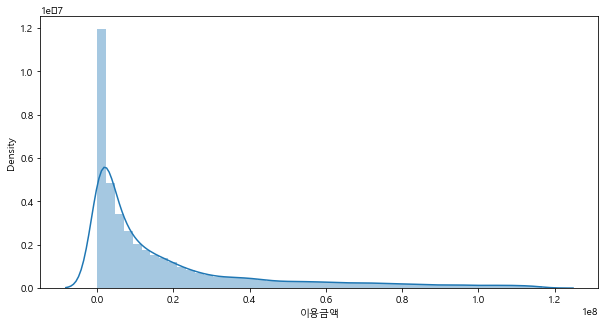

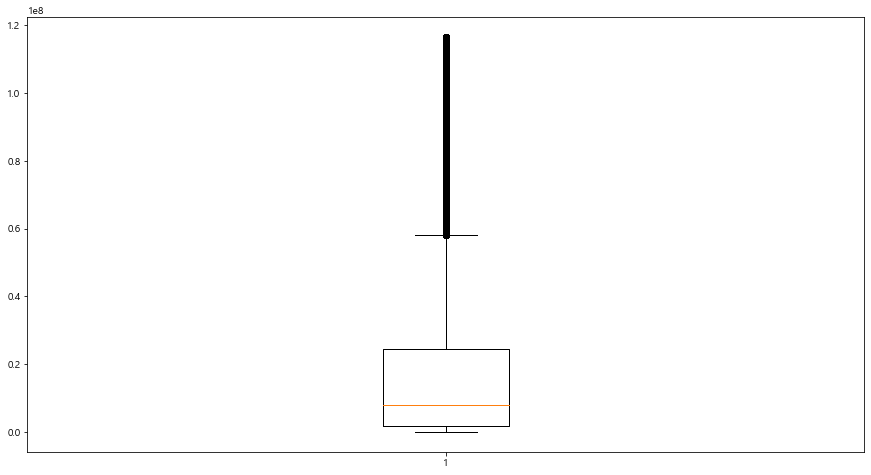

In [268]:
print_graph('이용금액')

이용금액에 관련하여 이상치 전처리를 한 이후에 분포모양을 살펴봤다.  
최댓값은 6000만원 정도  
최솟값은 0원에 가까운 정도  


##### 거주인구

<AxesSubplot:ylabel='Frequency'>

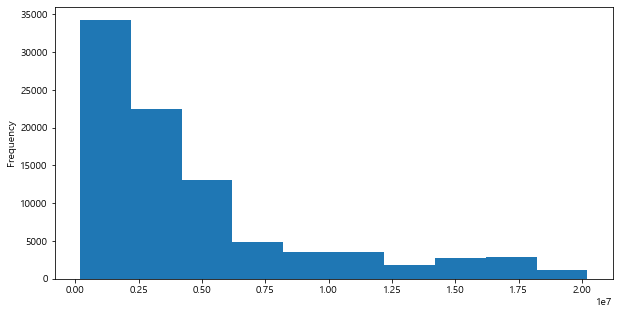

In [258]:
plt.figure(figsize = (10,5))                       #거주인구 히스토그램(전처리 전)
df_cd['거주인구'].plot(kind = 'hist')

C:\ca_da\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


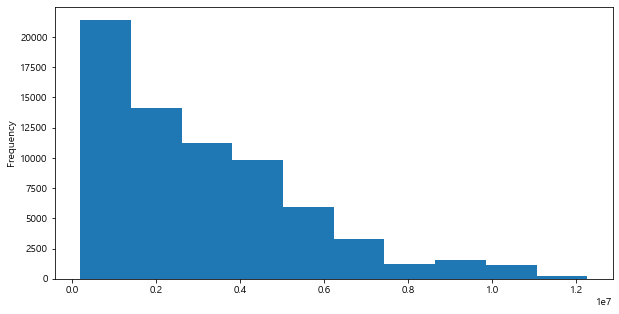

C:\ca_da\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ca_da\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


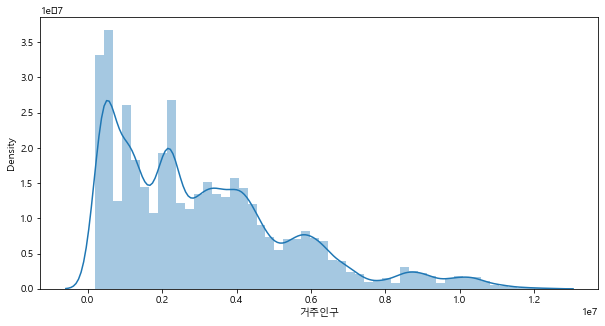

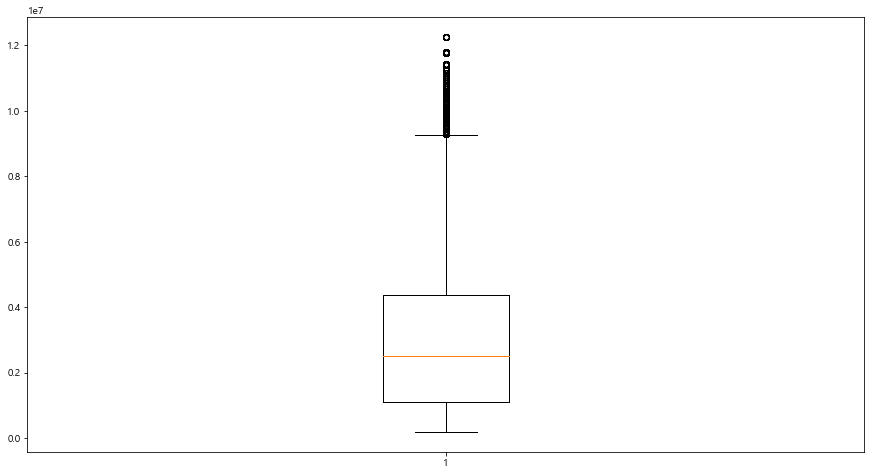

In [270]:
print_graph('거주인구')                     #이상치 제거 후의 분포도를 살펴보기

##### 근무인구

<AxesSubplot:ylabel='Frequency'>

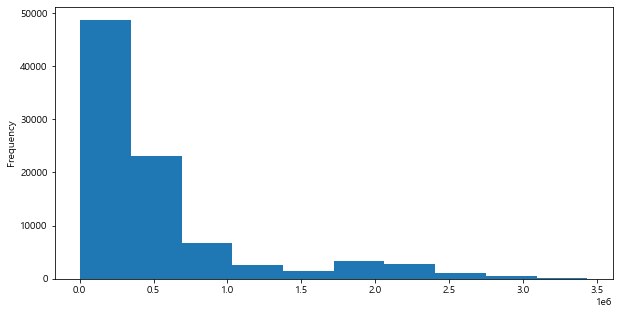

In [263]:
plt.figure(figsize = (10,5))                       #근무인구 히스토그램(전처리 전)
df_cd['근무인구'].plot(kind = 'hist')

C:\ca_da\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


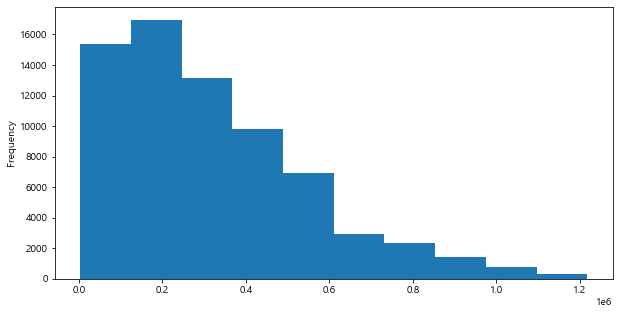

C:\ca_da\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ca_da\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


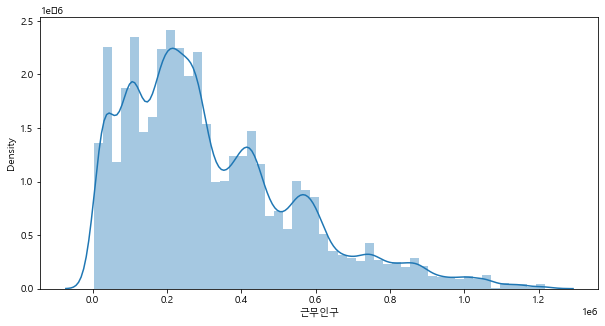

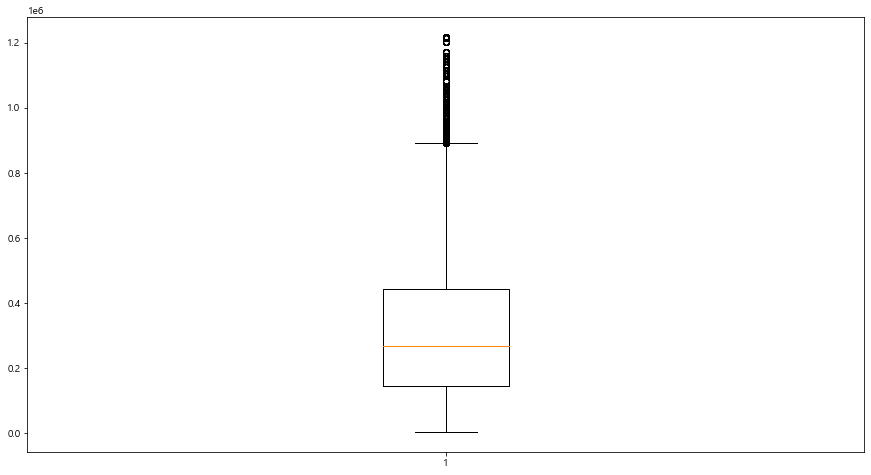

In [271]:
print_graph('근무인구')                     #이상치 제거 후의 분포도를 살펴보기

##### 방문인구

<AxesSubplot:ylabel='Frequency'>

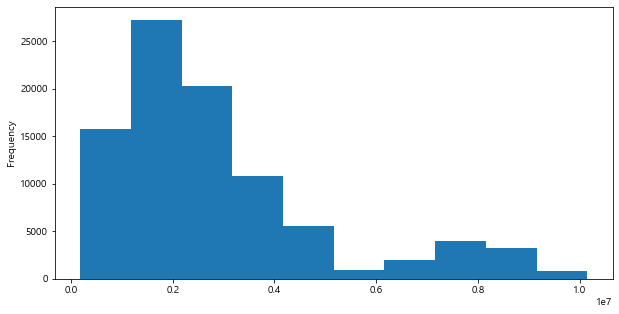

In [265]:
plt.figure(figsize = (10,5))                       #방문인구 히스토그램(전처리 전)
df_cd['방문인구'].plot(kind = 'hist')

C:\ca_da\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


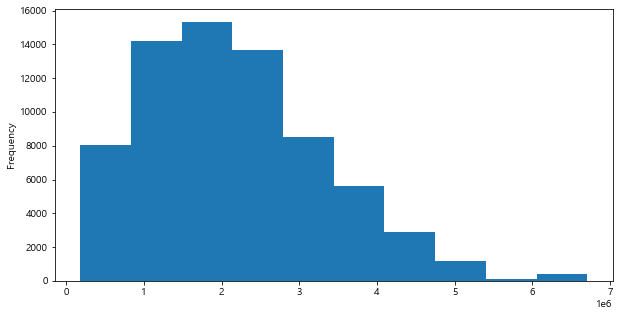

C:\ca_da\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ca_da\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


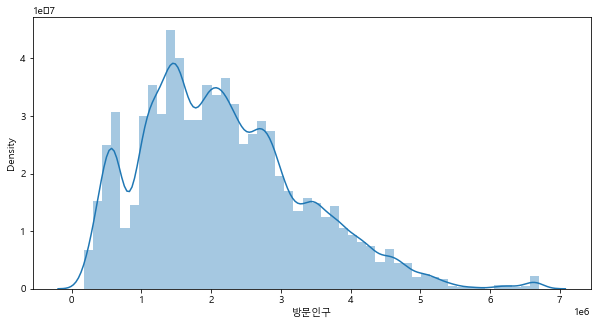

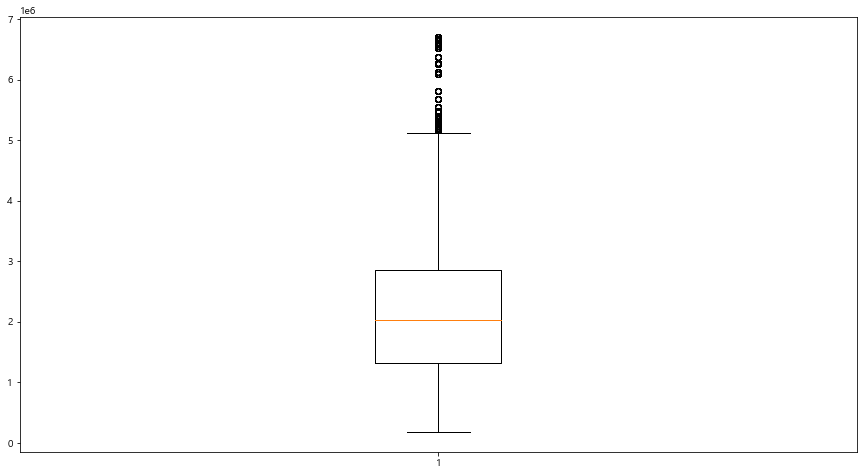

In [272]:
print_graph('방문인구')                     #이상치 제거 후의 분포도를 살펴보기

### 최종

In [368]:
df_cd.to_csv('상권분석을 위한 유동인구에 따른 카드 매출액 변화 데이터 활용.csv', index = False)